In [1]:

#wave形式の音声波形を読み込むためのモジュール(wave)をインポート
import wave as wave

#numpyをインポート（波形データを2byteの数値列に変換するために使用）
import numpy as np

#可視化のためにmatplotlibモジュールをインポート
import matplotlib.pyplot as plt

#pyroomacousticsをインポート (ここではデータセットをダウンロードするために使用)
import pyroomacoustics as pa

In [2]:
#CMU ARCTIC Corpusをカレントディレクトリにダウンロード
# pa.datasets.CMUArcticCorpus(basedir="./CMU_ARCTIC",download=True,speaker=["aew","axb"])

pa.datasets.CMUArcticCorpus(basedir="./", download=True, speakers=["aew", "axb"])

Download http://festvox.org/cmu_arctic/packed/cmu_us_aew_arctic.tar.bz2 into ./CMU_ARCTIC ...
Download http://festvox.org/cmu_arctic/packed/cmu_us_axb_arctic.tar.bz2 into ./CMU_ARCTIC ...


In [3]:

#読み込むサンプルファイル
sample_wave_file="./CMU_ARCTIC/cmu_us_aew_arctic/wav/arctic_a0001.wav"

In [4]:
#ファイルを読み込む
wav=wave.open(sample_wave_file)

In [5]:
type(wav)

wave.Wave_read

In [6]:
#PCM形式の波形データを読み込み
data = wav.readframes(wav.getnframes())

In [7]:
type(data) #波形データはバイト

bytes

In [8]:
#dataを2バイトの数値列に変換
"""
frombufferを使う
numpyでint16型を指定
"""
data=np.frombuffer(data, dtype=np.int16)

In [9]:
"""
np.frombufferでbyteを数値として扱える
=>解析できる
"""
type(data)

numpy.ndarray

In [10]:
"""
最大値で正規化
np.iinfo(np.int16).max  32767

バイトをint16列に変換している

このint16がとりうる最大の値が32767で最大値を指定しているのが
np.iinfo(np.int16).max
"""

#dataの値を2バイトの変数が取り得る値の最大値で正規化
data=data/np.iinfo(np.int16).max

In [11]:
#ファイルの情報を出力する
print("サンプリング周波数[Hz]: ",wav.getframerate()) 
print("サンプルサイズ[Byte]: ", wav.getsampwidth())
print("サンプル数: ",wav.getnframes()) 
print("チャンネル数: ",wav.getnchannels()) 

サンプリング周波数[Hz]:  16000
サンプルサイズ[Byte]:  2
サンプル数:  62081
チャンネル数:  1


In [12]:
#x軸の値
x=np.array(range(wav.getnframes()))/wav.getframerate()

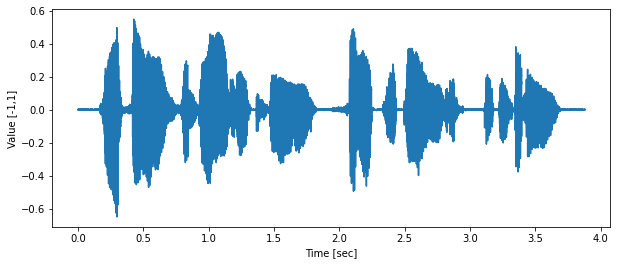

In [13]:
#音声データをプロットする
plt.figure(figsize=(10,4))

#x軸のラベル
plt.xlabel("Time [sec]")

#y軸のラベル
plt.ylabel("Value [-1,1]")

#データをプロット
plt.plot(x,data)

#音声ファイルを画像として保存
plt.savefig("./wave_form.png")

#画像を画面に表示
plt.show()